In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


# 2D Unet

reference: https://arxiv.org/pdf/1505.04597.pdf
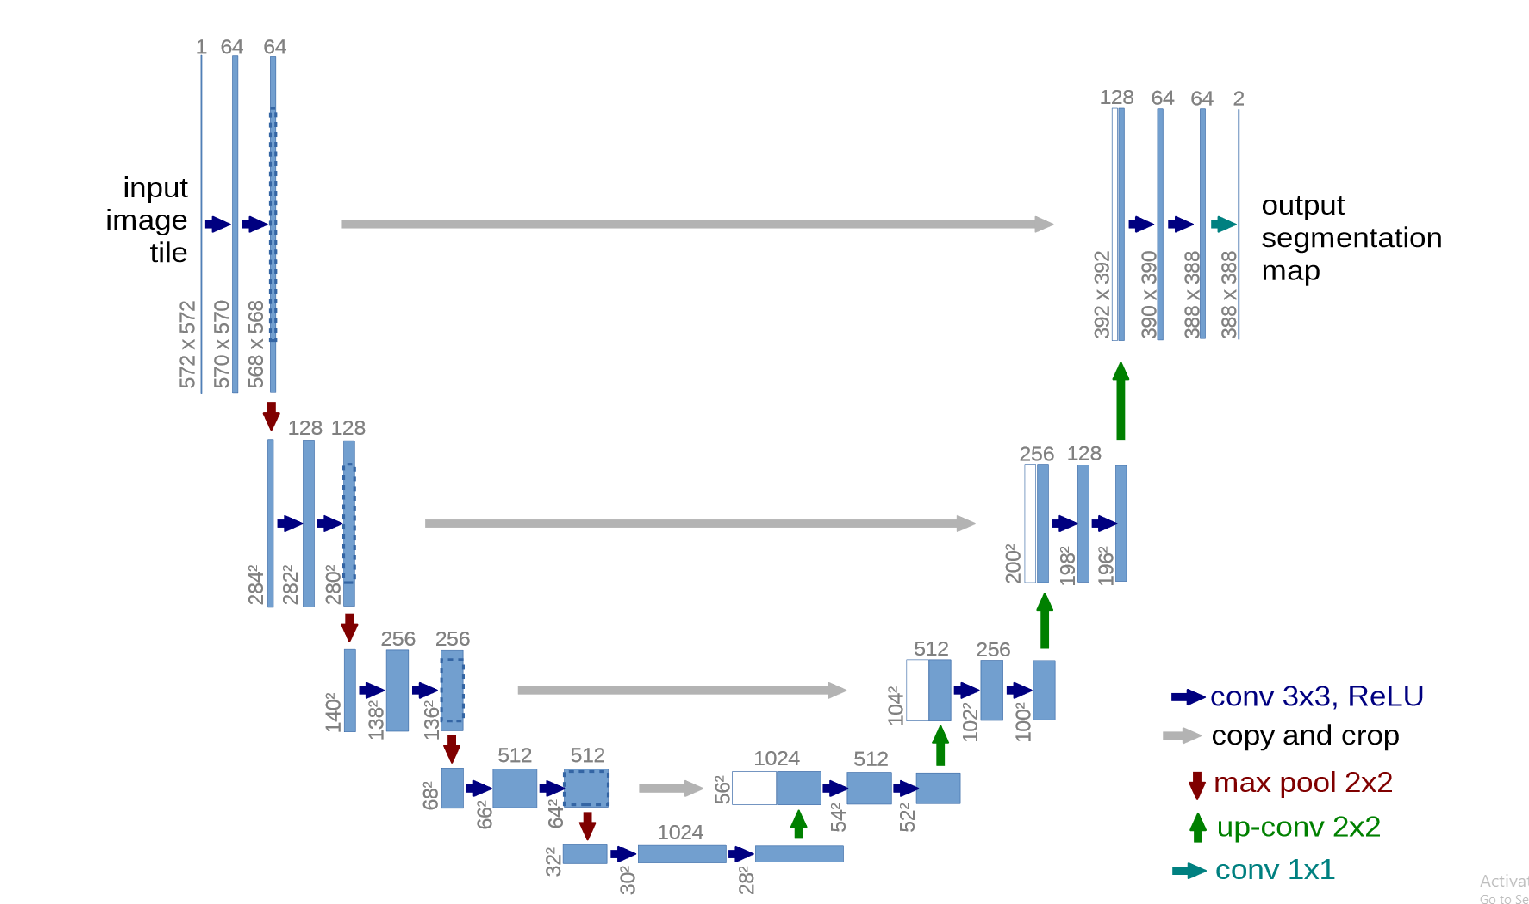

    Note: numbers need to be tuned for 512x512 images, paper uses 572x572 images

In [1]:
# convs: 3x3 unpadded, relu
# maxpooling: 2x2, stride = 2
#     double number of features after every maxpooling
# up-convolution: upsamping 2x2, followed by 2x2 convolution
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D, Cropping2D, Concatenate

def Unet2D(input_size = (512,512,1)):
    # Contracting Path
    inputs = Input(input_size)
    conv_1 = Conv2D(64,(3,3), activation='relu', padding='same')(inputs)
    conv_1 = Conv2D(64,(3,3), activation='relu', padding='same')(conv_1)
    maxP_1 = MaxPool2D(pool_size=(2,2), strides=2)(conv_1)

    conv_2 = Conv2D(128,(3,3), activation='relu', padding='same')(maxP_1)
    conv_2 = Conv2D(128,(3,3), activation='relu', padding='same')(conv_2)
    maxP_2 = MaxPool2D(pool_size=(2,2), strides=2)(conv_2)

    conv_3 = Conv2D(256,(3,3), activation='relu', padding='same')(maxP_2)
    conv_3 = Conv2D(256,(3,3), activation='relu', padding='same')(conv_3)
    maxP_3 = MaxPool2D(pool_size=(2,2), strides=2)(conv_3)

    conv_4 = Conv2D(512,(3,3), activation='relu', padding='same')(maxP_3)
    conv_4 = Conv2D(512,(3,3), activation='relu', padding='same')(conv_4)
    maxP_4 = MaxPool2D(pool_size=(2,2), strides=2)(conv_4)

    conv_5 = Conv2D(1024,(3,3), activation='relu', padding='same')(maxP_4)
    conv_5 = Conv2D(1024,(3,3), activation='relu', padding='same')(conv_5)
    
    # Expansive Path
    upSamp_6 = UpSampling2D(size=(2,2))(conv_5)
    upSamp_6 = Conv2D(512,(2,2), padding = 'same')(upSamp_6)
    crop_6 = Cropping2D()(conv_4)
    combine_6 = Concatenate()([crop_6,upSamp_6])
    conv_6 = Conv2D(512,(3,3), activation='relu', padding='same')(combine_6)
    conv_6 = Conv2D(512,(3,3), activation='relu', padding='same')(conv_6)
    
    upSamp_7 = UpSampling2D(size=(2,2))(conv_6)
    upSamp_7 = Conv2D(256,(2,2), padding = 'same')(upSamp_7)
    crop_7 = Cropping2D()(conv_3)
    combine_7 = Concatenate()([crop_7,upSamp_7])
    conv_7 = Conv2D(256,(3,3), activation='relu', padding='same')(combine_7)
    conv_7 = Conv2D(256,(3,3), activation='relu', padding='same')(conv_7)
    
    upSamp_8 = UpSampling2D(size=(2,2))(conv_7)
    upSamp_8 = Conv2D(128,(2,2), padding = 'same')(upSamp_8)
    crop_8 = Cropping2D()(conv_2)
    combine_8 = Concatenate()([crop_8,upSamp_8])
    conv_8 = Conv2D(128,(3,3), activation='relu', padding='same')(combine_8)
    conv_8 = Conv2D(128,(3,3), activation='relu', padding='same')(conv_8)
    
    upSamp_9 = UpSampling2D(size=(2,2))(conv_8)
    upSamp_9 = Conv2D(64,(2,2), padding = 'same')(upSamp_9)
    crop_9 = Cropping2D()(conv_1)
    combine_9 = Concatenate()([crop_9,upSamp_9])
    conv_9 = Conv2D(64,(3,3), activation='relu', padding='same')(combine_9)
    conv_9 = Conv2D(64,(3,3), activation='relu', padding='same')(conv_9)
    outputs = Conv2D(1,(1,1), activation='sigmoid', padding='same')(conv_9)
        
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    return model

x_2d = Unet2D()


# reduced U-net

In [1]:
# convs: 3x3 unpadded, relu
# maxpooling: 2x2, stride = 2
#     double number of features after every maxpooling
# up-convolution: upsamping 2x2, followed by 2x2 convolution
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D, Cropping2D, Concatenate

def Unet2D(input_size = (512,512,1)):
    # Contracting Path
    inputs = Input(input_size)
    conv_1 = Conv2D(32,(3,3), activation='relu', padding='same')(inputs)
    conv_1 = Conv2D(32,(3,3), activation='relu', padding='same')(conv_1)
    maxP_1 = MaxPool2D(pool_size=(2,2), strides=2)(conv_1)

    conv_2 = Conv2D(64,(3,3), activation='relu', padding='same')(maxP_1)
    conv_2 = Conv2D(64,(3,3), activation='relu', padding='same')(conv_2)
    maxP_2 = MaxPool2D(pool_size=(2,2), strides=2)(conv_2)

    conv_3 = Conv2D(128,(3,3), activation='relu', padding='same')(maxP_2)
    conv_3 = Conv2D(128,(3,3), activation='relu', padding='same')(conv_3)
    maxP_3 = MaxPool2D(pool_size=(2,2), strides=2)(conv_3)

    conv_4 = Conv2D(256,(3,3), activation='relu', padding='same')(maxP_3)
    conv_4 = Conv2D(256,(3,3), activation='relu', padding='same')(conv_4)
    maxP_4 = MaxPool2D(pool_size=(2,2), strides=2)(conv_4)

    conv_5 = Conv2D(512,(3,3), activation='relu', padding='same')(maxP_4)
    conv_5 = Conv2D(512,(3,3), activation='relu', padding='same')(conv_5)
    
    # Expansive Path
    upSamp_6 = UpSampling2D(size=(2,2))(conv_5)
    upSamp_6 = Conv2D(256,(2,2), padding = 'same')(upSamp_6)
    crop_6 = Cropping2D()(conv_4)
    combine_6 = Concatenate()([crop_6,upSamp_6])
    conv_6 = Conv2D(256,(3,3), activation='relu', padding='same')(combine_6)
    conv_6 = Conv2D(256,(3,3), activation='relu', padding='same')(conv_6)
    
    upSamp_7 = UpSampling2D(size=(2,2))(conv_6)
    upSamp_7 = Conv2D(128,(2,2), padding = 'same')(upSamp_7)
    crop_7 = Cropping2D()(conv_3)
    combine_7 = Concatenate()([crop_7,upSamp_7])
    conv_7 = Conv2D(128,(3,3), activation='relu', padding='same')(combine_7)
    conv_7 = Conv2D(128,(3,3), activation='relu', padding='same')(conv_7)
    
    upSamp_8 = UpSampling2D(size=(2,2))(conv_7)
    upSamp_8 = Conv2D(64,(2,2), padding = 'same')(upSamp_8)
    crop_8 = Cropping2D()(conv_2)
    combine_8 = Concatenate()([crop_8,upSamp_8])
    conv_8 = Conv2D(64,(3,3), activation='relu', padding='same')(combine_8)
    conv_8 = Conv2D(64,(3,3), activation='relu', padding='same')(conv_8)
    
    upSamp_9 = UpSampling2D(size=(2,2))(conv_8)
    upSamp_9 = Conv2D(32,(2,2), padding = 'same')(upSamp_9)
    crop_9 = Cropping2D()(conv_1)
    combine_9 = Concatenate()([crop_9,upSamp_9])
    conv_9 = Conv2D(32,(3,3), activation='relu', padding='same')(combine_9)
    conv_9 = Conv2D(32,(3,3), activation='relu', padding='same')(conv_9)
    outputs = Conv2D(1,(1,1), activation='sigmoid', padding='same')(conv_9)
        
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    return model

x_2d = Unet2D()


In [2]:
print(x_2d.summary(line_length = 150))

Model: "model"
______________________________________________________________________________________________________________________________________________________
Layer (type)                                     Output Shape                     Param #           Connected to                                      
input_1 (InputLayer)                             [(None, 512, 512, 1)]            0                                                                   
______________________________________________________________________________________________________________________________________________________
conv2d (Conv2D)                                  (None, 512, 512, 32)             320               input_1[0][0]                                     
______________________________________________________________________________________________________________________________________________________
conv2d_1 (Conv2D)                                (None, 512, 512, 32)          

# Load Data and Train

In [3]:
import os
import numpy as np

num_datasets = 10


# dealing with data's folder structure
d = '/home/kraibhat/Data/' 
fd = os.listdir(d)
fs = []
[fs.append(f) for f in fd if '.zip' not in f and 'LCTSC' in f]

for i,f in enumerate(fs):
    t = os.listdir(os.path.join(d,f))
    fs[i] = os.path.join(d, f,t[0])

data = []
heart = []
# esophagus = []
# lungL = []
# lungR = []
# spine = []

i=0
for f in fs:
    if i < num_datasets:
        data_dir = os.path.join(d,f,'CTvolume.npy')
        heart_dir = os.path.join(d,f,'Heart.npy')
#         esophagus_dir = os.path.join(d,f,'Esophagus.npy')
#         lungL_dir = os.path.join(d,f,'Lung_L.npy')
#         lungR_dir = os.path.join(d,f,'Lung_R.npy')
#         spine_dir = os.path.join(d,f,'SpinalCord.npy')
        
        data.append(np.load(data_dir))
        heart.append(np.load(heart_dir))
#         esophagus.append(np.load(esophagus_dir))
#         lungL.append(np.load(lungL_dir))
#         lungR.append(np.load(lungR_dir))
#         spine.append(np.load(spine_dir))
        i+=1


data = np.concatenate(data, axis = -1)
heart = np.concatenate(heart, axis = -1)
# esophagus = np.concatenate(esophagus, axis = -1)
# lungL = np.concatenate(lungL, axis = -1)
# lungR = np.concatenate(lungR, axis = -1)
# spine = np.concatenate(spine, axis = -1)

heart = heart / np.amax(heart)
data = data / np.amax(data)

In [4]:
# resize data and partition data
from sklearn.model_selection import train_test_split

old_size = data.shape
new_size = (old_size[2], old_size[1],old_size[0], 1)

data = np.transpose(data)
data_reshape = data.reshape(new_size)

heart = np.transpose(heart)
heart_reshape = heart.reshape(new_size)

# esophagus = np.transpose(esophagus)
# esophagus_reshape = esophagus.reshape(new_size)

# lungL = np.transpose(lungL)
# lungL_reshape = lungL.reshape(new_size)

# lungR = np.transpose(lungR)
# lungR_reshape = lungR.reshape(new_size)

# spine = np.transpose(spine)
# spine_reshape = spine.reshape(new_size)

data_train, data_val, heart_train, heart_val = train_test_split(data_reshape, heart_reshape, test_size = .2, random_state = 42)
#esophagus_reshape, lungL_reshape, lungR_reshape, spine_reshape, test_size = .2, random_state = 42


In [ ]:
# Compile and train the model
x_2d.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history = x_2d.fit(data_train, heart_train, epochs=4, batch_size=4, shuffle=True,validation_data=(data_val, heart_val))

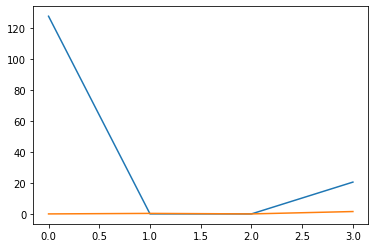

In [10]:
import matplotlib.pyplot as plt
history.history.keys()
epochs = [x for x in range(4)]
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])

# Data Generator

In [2]:
import os
import numpy as np
import random


datadir = './LCTSC/data/'
segdir = './LCTSC/heart/'

#z-axis crop limit
croplimit = 25


def data_gen(data_folder, label_folder, batch_size):
    c = 1
    datalis = sorted(os.listdir(data_folder)) #List of training images
    labellis = sorted(os.listdir(label_folder))
    
#     random.shuffle(datalis)
#     random.shuffle(labellis)
    

    while (True):
        dataarr = np.zeros((batch_size*croplimit, 512, 512,1)).astype('float')
        labelarr = np.zeros((batch_size*croplimit, 512, 512, 1)).astype('float')
        
        index = 0
        i=1
        while i < c+batch_size: #get volumes of data according to the batchsize
            print(datalis[i], labellis[i])
            if 'CTvolume.npy' in datalis[i] and 'Heart' in labellis[i]:
                train_data = np.load(data_folder + '/' + datalis[i])[:,:,:croplimit].T #crop z axis by croplimit
                label_data = np.load(label_folder + '/' + labellis[i])[:,:,:croplimit].T #crop z axis by croplimit

                dataarr[index:index+croplimit,:,:,0] = train_data
                labelarr[index:index+croplimit,:,:,0] = label_data
                index+=1
                i+=1
            
        c+=batch_size
        
        if(c+batch_size>=len(os.listdir(data_folder))) or (c+batch_size>=len(os.listdir(label_folder))):
            c=0
            random.shuffle(datalis)
            random.shuffle(labellis)
            # print "randomizing again"

        yield dataarr, labelarr
    
    
train_gen = data_gen(datadir,segdir, batch_size = 1)

In [ ]:
train, label = next(train_gen)

In [ ]:
# Compile and train the model, using generator
x_2d.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history = x_2d.fit(train_gen, epochs=5, shuffle=True)

In [2]:
def image_generator(inds, batch_size = 3):

    croplimit = 10
    datadir = './LCTSC/data/'
    segdir = './LCTSC/seg/'

    while True: 
    
        #extract a random batch 
        batch = np.random.choice(inds, size = batch_size)    

        #variables for collecting batches of inputs and outputs 
        batch_x = []
        batch_y = []

        for f in batch:
            print(f)
            #get the Masks and CT scans. Note that they are stored as NP arrays
            data = np.load(datadir + f + '_CTvolume.npy')[:,:,50:50+croplimit].T
            mask = np.load(segdir + f + '_Heart.npy')[:,:,50:50+croplimit].T

            batch_y.append(mask)
            batch_x.append(data)

        #preprocess a batch of images and masks 
        batch_x = np.concatenate(batch_x, axis = 0)
        batch_x = batch_x.reshape((batch_x.shape[0],batch_x.shape[1],batch_x.shape[2],1))
        batch_y = np.concatenate(batch_y, axis = 0)
        batch_y = batch_y.reshape((batch_y.shape[0],batch_y.shape[1],batch_y.shape[2],1))/2
        yield (batch_x, batch_y)  
    



In [3]:
datadir = './LCTSC/data/'
segdir = './LCTSC/seg/'
import os

data_files = sorted(os.listdir(datadir))
seg_files = sorted(os.listdir(segdir))

D = [d[:-13] for d in data_files if 'CTvolume' in d]

batch_size = 1
train_gen = image_generator(D, batch_size = batch_size)

In [41]:
train, label = next(train_gen)

(150, 512, 512, 1)
(150, 512, 512, 1)
15


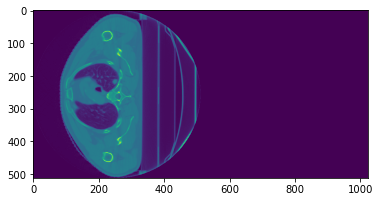

16


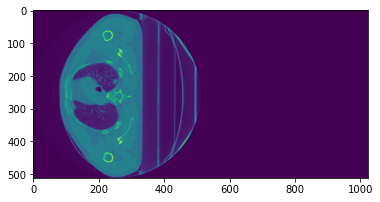

17


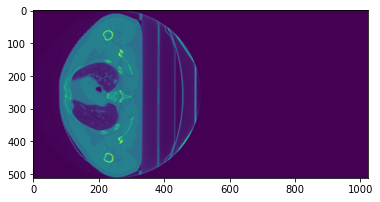

18


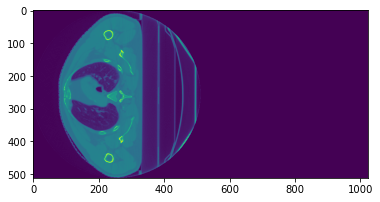

19


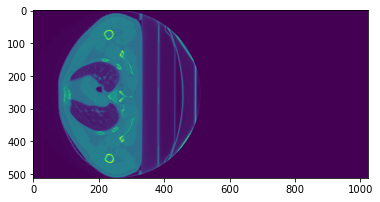

20


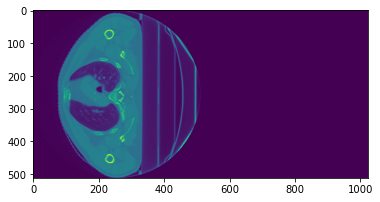

21


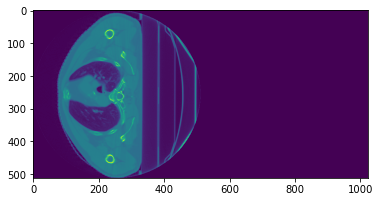

22


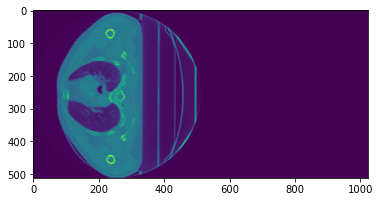

23


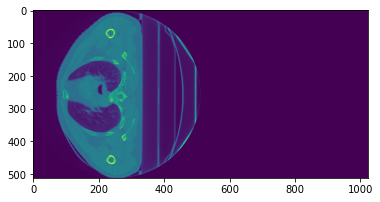

24


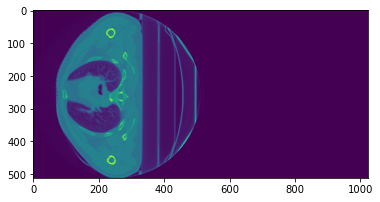

25


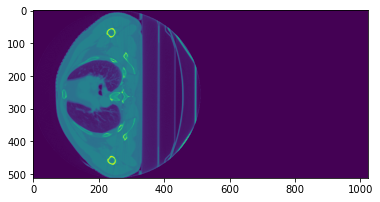

26


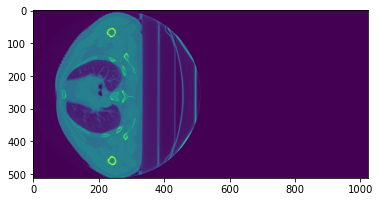

27


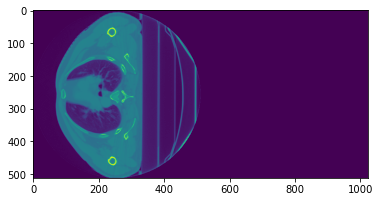

28


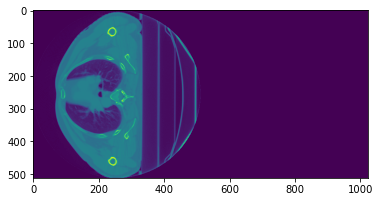

29


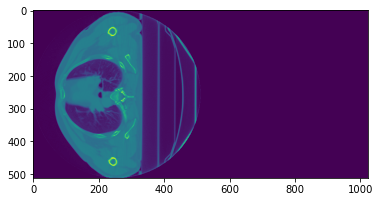

30


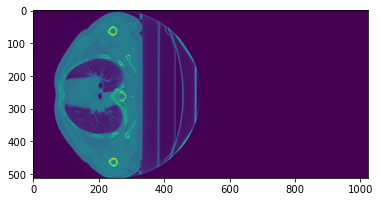

31


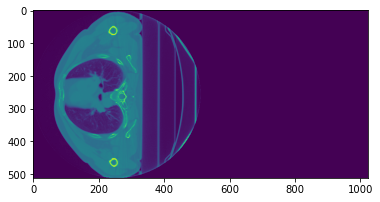

32


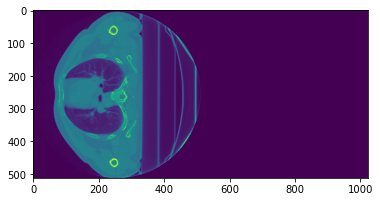

33


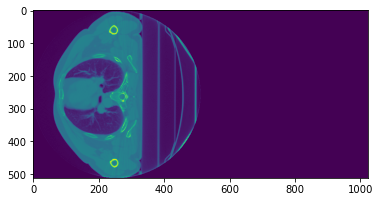

34


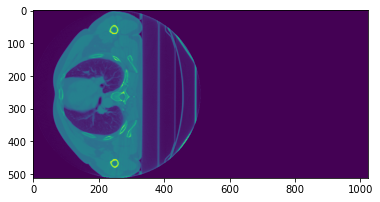

In [42]:
print(train.shape)
print(label.shape)

import matplotlib.pyplot as plt
for i in range(15,35,1):
    print(i)
    A = train[i,:,:,0]
    B = label[i,:,:,0]/10

    plt.imshow(np.concatenate([A,B],axis = 1))
    plt.show()


In [4]:
# Compile and train the model, using generator
x_2d.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
train_steps = len(D) //batch_size
history = x_2d.fit_generator(train_gen, steps_per_epoch = 12*train_steps, epochs=3, shuffle=True)

Instructions for updating:
Please use Model.fit, which supports generators.
048
  ...
    to  
  ['...']
Train for 720 steps
Epoch 1/3
045
025
024
027
058
020
039
  2/720 [..............................] - ETA: 44:42 - loss: 0.6847 - accuracy: 0.9515  024
009
 10/720 [..............................] - ETA: 13:46 - loss: 139.9133 - accuracy: 0.9879039
044
 22/720 [..............................] - ETA: 9:26 - loss: 63.7599 - accuracy: 0.9929002
028
 32/720 [>.............................] - ETA: 8:24 - loss: 43.8457 - accuracy: 0.9940038
035
 37/720 [>.............................] - ETA: 8:07 - loss: 37.9209 - accuracy: 0.9948035
002
 43/720 [>.............................] - ETA: 7:49 - loss: 32.6296 - accuracy: 0.9956058
046
 52/720 [=>............................] - ETA: 7:24 - loss: 27.1513 - accuracy: 0.9959056
039
 55/720 [=>............................] - ETA: 7:19 - loss: 25.6783 - accuracy: 0.9953027
010
 57/720 [=>............................] - ETA: 7:15 - loss: 24.7785 - ac

KeyboardInterrupt: 